# Genération de jeux de données artificiels

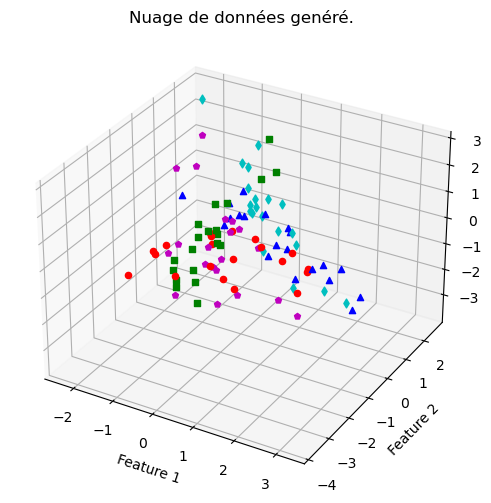

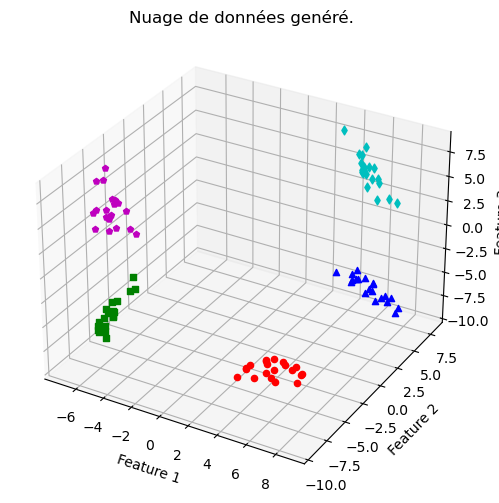

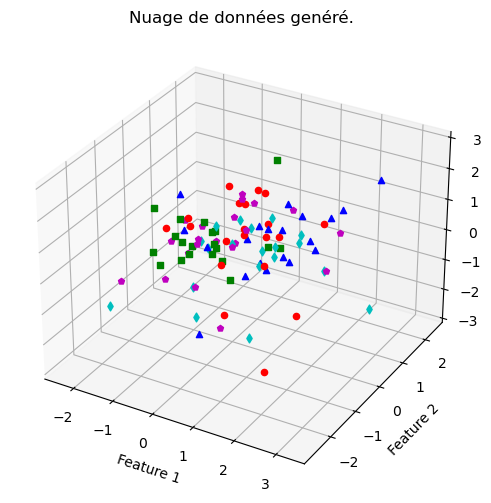

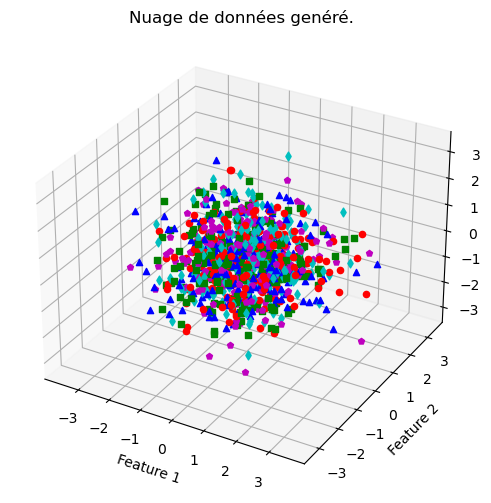

In [10]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Xs1, ys1 = make_classification(n_features=3, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)
Xs2, ys2 = make_classification(n_features=3, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=6, random_state=42)
Xs3, ys3 = make_classification(n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)
Xs4, ys4 = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)

def plot_3D(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='r', marker='o')
        elif y[i] == 1:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='b', marker='^')
        elif y[i] == 2:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='g', marker='s')
        elif y[i] == 3:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='c', marker='d')
        else:
            ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='m', marker='p')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Nuage de données genéré.')
    plt.show()

plot_3D(Xs1, ys1)
plot_3D(Xs2, ys2)
plot_3D(Xs3, ys3)
plot_3D(Xs4, ys4)

# Experimentations du one versus all

In [15]:
def one_vs_all(X, y, classifier):
    
    classifiers = []
    
    for i in range(5):
        
        clf = OneVsRestClassifier(classifier)
        clf.fit(X,y==i)
        classifiers.append(clf)
        
    return classifiers

def prediction (X, model):
    cptTrue = 0
    predictions = []
    for x in X:
        labels = []
        for i in range(5):
            label = model[i].predict([x])[0]
            if label == True:
                labels.append(i)
        predictions.append(random.randint(0, 5)) if not labels else predictions.append(max(labels))
            
    return np.array(predictions)

def hold_out_eval (X, y, classifieur, n):
    scors = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        model = one_vs_all(X_train, y_train, classifieur)
        pred = prediction (X_test, model)
        scors.append(accuracy_score(y_test, pred))
        
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10))

def eval_CMNwD (X, y, classifieur):
    scors = []
    s = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        model = one_vs_all(X_train, y_train, classifieur)
        pred = prediction (X_test, model)
        mat_conf = confusion_matrix(y_test, pred)
        mean = (1 / (mat_conf.shape[0] * (mat_conf.shape[0] - 1))) * np.sum(mat_conf - np.diag(np.diag(mat_conf)))
        scors.append(np.linalg.norm(mean))
    
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10))

print("10 hold-out")
neigh = KNeighborsClassifier()
print("KNeighborsClassifier")
r = hold_out_eval(Xs1, ys1, neigh, 10)
print("S1 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs2, ys2, neigh, 10)
print("S2 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs3, ys3, neigh, 10)
print("S3 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs4, ys4, neigh, 10)
print("S4 : " + str(r[0]) + " +/- " + str(r[1]))

print("DecisionTreeClassifier")

dt = DecisionTreeClassifier()
r = hold_out_eval(Xs1, ys1, dt, 10)
print("S1 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs2, ys2, dt, 10)
print("S2 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs3, ys3, dt, 10)
print("S3 : " + str(r[0]) + " +/- " + str(r[1]))
r = hold_out_eval(Xs4, ys4, dt, 10)
print("S4 : " + str(r[0]) + " +/- " + str(r[1]))


MACC
KNeighborsClassifier
S1 : 0.37 +/- 0.06817870635323026
S2 : 1.0 +/- 0.0
S3 : 0.29000000000000004 +/- 0.07039647718458644
S4 : 0.39499999999999996 +/- 0.02633265653138703
DecisionTreeClassifier
S1 : 0.42000000000000004 +/- 0.09109256830279844
S2 : 0.95 +/- 0.04157787873376898
S3 : 0.39 +/- 0.06470969015533917
S4 : 0.529 +/- 0.022079380426089857


In [16]:
print("CMNwD")
print("KNeighborsClassifier")
r = eval_CMNwD(Xs1, ys1, neigh)
print("S1 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs2, ys2, neigh)
print("S2 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs3, ys3, neigh)
print("S3 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs4, ys4, neigh)
print("S4 : " + str(r[0]) + " +/- " + str(r[1]))

print("DecisionTreeClassifier")
r = eval_CMNwD(Xs1, ys1, dt)
print("S1 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs2, ys2, dt)
print("S2 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs3, ys3, dt)
print("S3 : " + str(r[0]) + " +/- " + str(r[1]))
r = eval_CMNwD(Xs4, ys4, dt)
print("S4 : " + str(r[0]) + " +/- " + str(r[1]))



CMNwD
KNeighborsClassifier
S1 : 0.3083333333333334 +/- 0.05431907788449858
S2 : 0.0 +/- 0.0
S3 : 0.265 +/- 0.04039322825535103
S4 : 2.0533333333333337 +/- 0.0961088641998113
DecisionTreeClassifier
S1 : 0.2833333333333334 +/- 0.0550508451847522
S2 : 0.025 +/- 0.020788939366884498
S3 : 0.31833333333333336 +/- 0.053167446180283406
S4 : 1.7416666666666667 +/- 0.11514710398249516


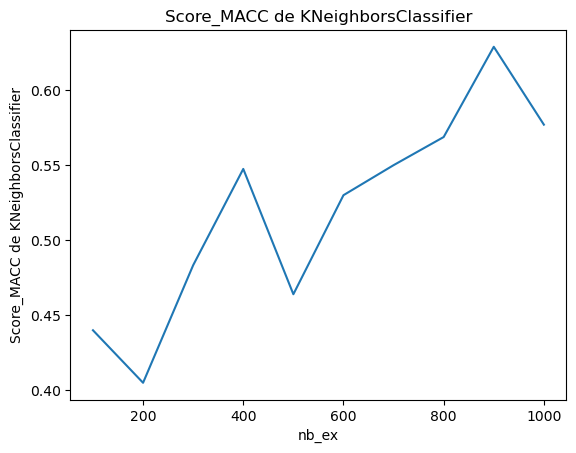

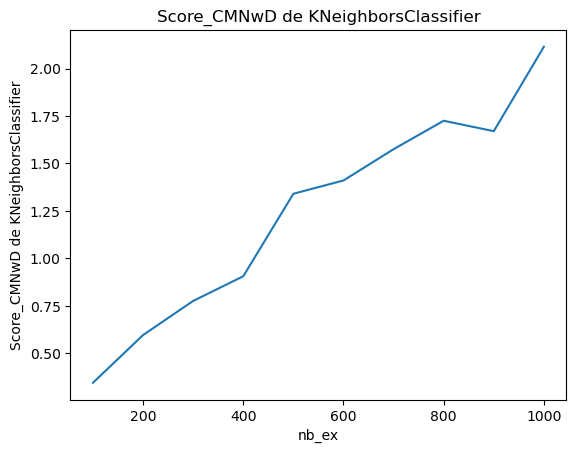

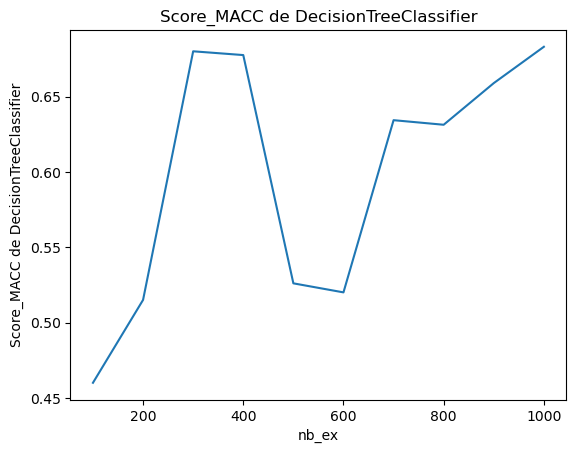

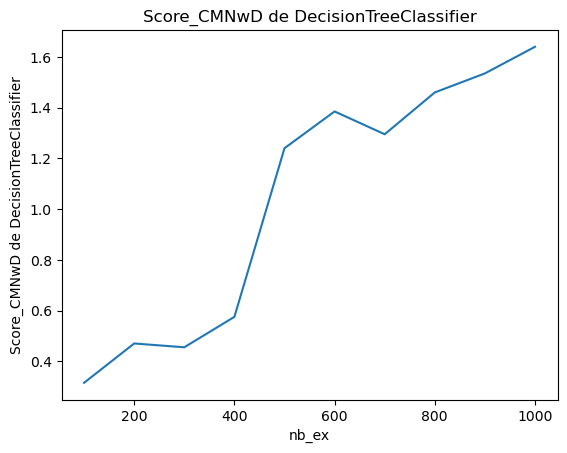

In [18]:
def etu_eval_hold_out(X, y, classifieur, n):
    scors = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        model = classifieur.fit(X_train, y_train)
        pred = model.predict(X_test)
        scors.append(accuracy_score(y_test, pred))
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10))

def etu_eval_CMNwD(X, y, classifieur):
    scors = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        model = classifieur.fit(X_train, y_train)
        pred = model.predict(X_test)
        mat_conf = confusion_matrix(y_test, pred)
        norme = (1 / (mat_conf.shape[0] * (mat_conf.shape[0] - 1))) * np.sum(mat_conf - np.diag(np.diag(mat_conf)))
        scors.append(norme)
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10))


neigh = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb_ex = range(100, 1100, 100)
scors_MACC_KNeighborsClassifier = []
scors_CMNwD_KNeighborsClassifier = []
scors_MACC_DecisionTreeClassifier = []
scors_CMNwD_DecisionTreeClassifier = []
for i in nb_ex:
    Xs4, ys4 = make_classification(n_samples=i, n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.7, random_state=42)
    scors_MACC_KNeighborsClassifier.append(etu_eval_hold_out(Xs4, ys4, neigh, 10)[0])
    scors_CMNwD_KNeighborsClassifier.append(etu_eval_CMNwD(Xs4, ys4, neigh)[0])
    scors_MACC_DecisionTreeClassifier.append(etu_eval_hold_out(Xs4, ys4, dt, 10)[0])
    scors_CMNwD_DecisionTreeClassifier.append(etu_eval_CMNwD(Xs4, ys4, dt)[0])
    
plt.plot(nb_ex, scors_MACC_KNeighborsClassifier)
plt.xlabel('nb_ex')
plt.ylabel('Score_MACC de KNeighborsClassifier')
plt.title(f'Score_MACC de KNeighborsClassifier')
plt.show()
plt.plot(nb_ex, scors_CMNwD_KNeighborsClassifier)
plt.xlabel('nb_ex')
plt.ylabel('Score_CMNwD de KNeighborsClassifier')
plt.title(f'Score_CMNwD de KNeighborsClassifier')
plt.show()

plt.plot(nb_ex, scors_MACC_DecisionTreeClassifier)
plt.xlabel('nb_ex')
plt.ylabel('Score_MACC de DecisionTreeClassifier')
plt.title(f'Score_MACC de DecisionTreeClassifier')
plt.show()
plt.plot(nb_ex, scors_CMNwD_DecisionTreeClassifier)
plt.xlabel('nb_ex')
plt.ylabel('Score_CMNwD de DecisionTreeClassifier')
plt.title(f'Score_CMNwD de DecisionTreeClassifier')
plt.show()

In [20]:
Xs4, ys4 = make_classification(n_samples=900, n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.7, random_state=42)
r = etu_eval_hold_out(Xs4, ys4, neigh, 10)
print("KNeighborsClassifier - nb_ex = 900 : " + str(r[0]) + " +/- " + str(r[1]))
r = etu_eval_hold_out(Xs4, ys4, dt, 10)
print("DecisionTreeClassifier - nb_ex = 900 : " + str(r[0]) + " +/- " + str(r[1]))

KNeighborsClassifier - nb_ex = 900 : 0.6288888888888889 +/- 0.019527272476471732
DecisionTreeClassifier - nb_ex = 900 : 0.6644444444444444 +/- 0.023616591782206993


In [21]:
Xs4, ys4 = make_classification(n_samples=900, n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.7, random_state=42)
r = etu_eval_CMNwD(Xs4, ys4, neigh)
print("KNeighborsClassifier - nb_ex = 900 : " + str(r[0]) + " +/- " + str(r[1]))
r = etu_eval_CMNwD(Xs4, ys4, dt)
print("DecisionTreeClassifier - nb_ex = 900 : " + str(r[0]) + " +/- " + str(r[1]))

KNeighborsClassifier - nb_ex = 900 : 1.67 +/- 0.08787272614412277
DecisionTreeClassifier - nb_ex = 900 : 1.5900000000000003 +/- 0.07437677056716029


# Perceptron multi-classes

In [23]:
class Perceptron_multi_classes:
    def __init__(self, n):
        self.n = n
    
    def fit(self, X, Y):
        self.w = np.zeros((len(np.unique(Y)), X.shape[1]))
        for i in range (self.n):
            for j in range(len(Y)):
                y = np.argmax(np.dot(self.w, X[j]))
                if y != Y[j]:
                    self.w[Y[j], :] += X[j]
                    self.w[y, :] -= X[j]
        return self
    def predict_example(self, x):
        return np.argmax(np.dot(self.w, x))
    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.predict_example(x))
        return np.array(predictions)
    


X_train, X_test, y_train, y_test = train_test_split(Xs1, ys1, test_size=0.1, random_state=42)

percept = Perceptron_multi_classes(100)
print(percept.fit(X_train, y_train))
print(percept.predict_example(X_test[0]))
print(percept.predict(X_test))

4
[4 0 0 2 0 2 0 0 2 3]


In [33]:
import time
def etu_eval_hold_out_te(X, y, classifieur, n):
    scors = []
    times = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        start_time = time.time()
        model = classifieur.fit(X_train, y_train)
        end_time = time.time()
        times.append(end_time - start_time)
        pred = model.predict(X_test)
        scors.append(accuracy_score(y_test, pred))
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10)), np.mean(times)

def etu_eval_CMNwD_te(X, y, classifieur):
    scors = []
    times = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
        start_time = time.time()
        model = classifieur.fit(X_train, y_train)
        end_time = time.time()
        times.append(end_time - start_time)
        pred = model.predict(X_test)
        mat_conf = confusion_matrix(y_test, pred)
        norme = (1 / (mat_conf.shape[0] * (mat_conf.shape[0] - 1))) * np.sum(mat_conf - np.diag(np.diag(mat_conf)))
        scors.append(norme)
    return np.mean(scors), (1.96 * np.std(scors) / np.sqrt(10)), np.mean(times)


percept = Perceptron_multi_classes(1000)
sr = etu_eval_hold_out_te(Xs1, ys1, percept, 5)
mr = etu_eval_CMNwD_te(Xs1, ys1, percept)
print("S1 ==> Score moyen = " + str(sr[0]) + " CMNwD = " + str(mr[0])  + " Temps d'apprentissage moyen = " + str(sr[2]) + "s")

sr = etu_eval_hold_out_te(Xs2, ys2, percept, 5)
mr = etu_eval_CMNwD_te(Xs2, ys2, percept)
print("S2 ==> Score moyen = " + str(sr[0]) + " CMNwD = " + str(mr[0])  + " Temps d'apprentissage moyen = " + str(sr[2]) + "s")


S1 ==> Score moyen = 0.28 CMNwD = 0.4083333333333333 Temps d'apprentissage moyen = 0.7193820476531982s
S2 ==> Score moyen = 1.0 CMNwD = 0.0 Temps d'apprentissage moyen = 0.47391324043273925s


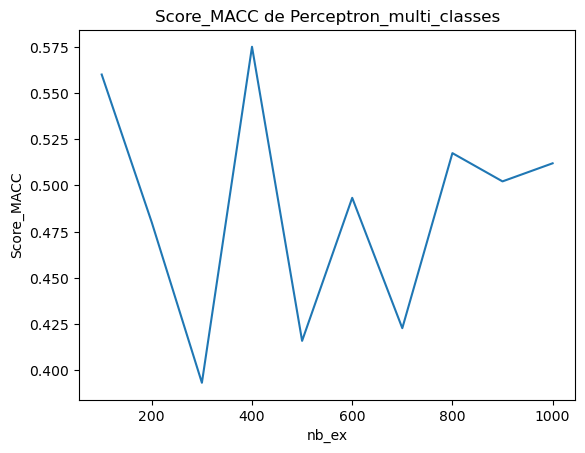

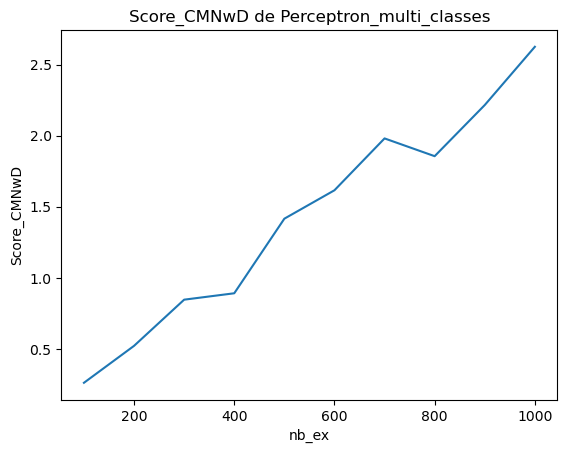

In [10]:
nb_ex = range(100, 1100, 100)
scors_MACC = []
scors_CMNwD = []
for i in nb_ex:
    Xs3, ys3 = make_classification(n_samples=i, n_features=10, n_informative=3, n_classes=5, n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)
    scors_MACC.append(etu_eval_hold_out(Xs3, ys3, percept, 5)[0])
    scors_CMNwD.append(etu_eval_CMNwD(Xs3, ys3, percept)[0])
    
plt.plot(nb_ex, scors_MACC)
plt.xlabel('nb_ex')
plt.ylabel('Score_MACC')
plt.title(f'Score_MACC de Perceptron_multi_classes')
plt.show()
plt.plot(nb_ex, scors_CMNwD)
plt.xlabel('nb_ex')
plt.ylabel('Score_CMNwD')
plt.title(f'Score_CMNwD de Perceptron_multi_classes')
plt.show()

In [38]:
from sklearn.metrics import classification_report

digitsData=load_digits()
Xdigits=digitsData.data
ydigits=digitsData.target

X_train, X_test, y_train, y_test = train_test_split(Xdigits, ydigits, test_size=0.1, random_state=i)
percept.fit(X_train, y_train)
y_pred = percept.predict(X_test)
report = classification_report(y_test, y_pred)
print("Rapport de classification:\n", report)

Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      0.95      0.97        19
           4       0.95      0.95      0.95        19
           5       0.95      0.95      0.95        21
           6       0.95      1.00      0.98        21
           7       1.00      0.94      0.97        18
           8       0.83      0.91      0.87        11
           9       0.86      1.00      0.92        12

    accuracy                           0.96       180
   macro avg       0.95      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

